In [1]:
from hao.ViT import ViT
from data_ISIC import ISICDataModule
import hao.utils as u
from d2l import torch as d2l

In [2]:
img_size, patch_size, batch_size = 16, 8, 128
num_workers = 4
num_classes = 10
max_epochs = 5
use_bias = False
restart_train = True
gpu_idx = 0
num_hiddens, mlp_num_hiddens, num_heads, num_blks = 128, 512, 4, 2
emb_dropout, blk_dropout, lr = 0.1, 0.1, 0.1
last_model_path = r'model_pth/last_model.pth'
best_model_path = r'model_pth/best_model.pth'

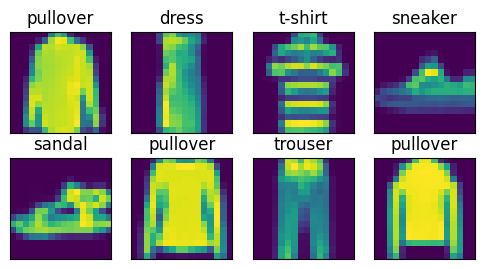

In [3]:
data = d2l.FashionMNIST(batch_size, resize=(img_size, img_size))
train_loader = data.get_dataloader(train=True)
test_loader = data.get_dataloader(train=False)

batch = next(iter(train_loader))
data.visualize(batch, nrows=2, ncols=4)

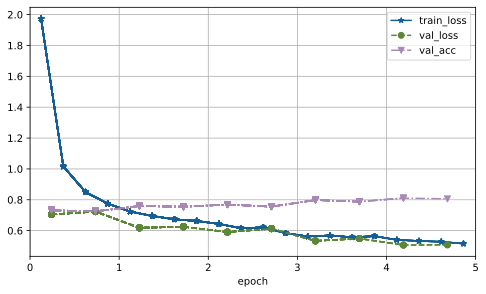

In [4]:
model = ViT(img_size, patch_size, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, lr, use_bias, num_classes)
trainer = u.Trainer(max_epochs, last_model_path, best_model_path, restart_train, gpu_idx)
trainer.fit(model, data)

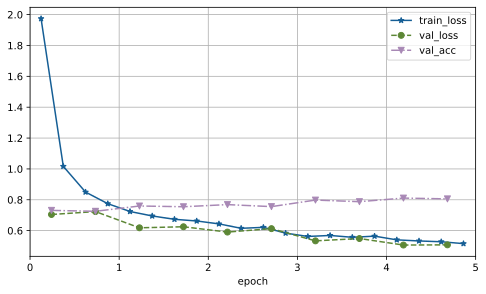

In [5]:
model.board.draw_his()

In [6]:
trainer.print_training_his(max_epochs)

Epoch 1 : train loss 1.1527 val loss 0.7091 val acc 73.01%
Epoch 2 : train loss 0.6884 val loss 0.6216 val acc 75.75%
Epoch 3 : train loss 0.6156 val loss 0.5994 val acc 76.30%
Epoch 4 : train loss 0.5627 val loss 0.5393 val acc 79.37%
Epoch 5 : train loss 0.5295 val loss 0.5067 val acc 80.86%
